<H2>KidneyNet-V Model</H2>

<H5><B>Contributors:</B> Komare Vishnu Vardhan, Ponnala Vihaarika Reddy</H5>

In [1]:
import torch
from fastai.vision.all import *
from fastai.callback.tracker import EarlyStoppingCallback

In [2]:
class KidneyNetV(nn.Module):
    def __init__(self):
        super().__init__()
        self.base_model = models.mobilenet_v2(pretrained=True)
        self.base_model.classifier = nn.Identity()  # Remove the original classifier
        self.custom_layers = nn.Sequential(
            nn.Dropout(p=0.5),  # Added dropout for regularization
            nn.Linear(1280, 2)  # Output size should match the number of classes
        )

    def forward(self, x):
        x = self.base_model(x)  # Get features from MobileNet
        x = x.view(x.size(0), -1)  # Flatten the output
        return self.custom_layers(x)


In [3]:
# Data loaders
dls = ImageDataLoaders.from_folder('Dataset', valid_pct=0.2, item_tfms=Resize(224))

In [4]:
# Initialize model and learner
model = KidneyNetV()
learn = Learner(dls, model, metrics=accuracy)

c:\Users\vishn\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\vishn\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [5]:
# Early stopping callback
early_stopping = EarlyStoppingCallback(monitor='valid_loss', patience=3)

In [6]:
# Training with a learning rate finder and fit with callbacks
learn.fit_one_cycle(10, 1e-3, cbs=[early_stopping]) 

epoch,train_loss,valid_loss,accuracy,time
0,0.638287,0.681732,0.626741,03:14
1,0.433242,0.707876,0.704735,03:47
2,0.287985,0.327746,0.927577,02:50
3,0.208698,0.125144,0.941504,02:52
4,0.147754,0.048086,0.983287,04:19
5,0.101587,0.107390,0.952646,04:46
6,0.071681,0.034178,0.988858,03:57
7,0.048892,0.035174,0.988858,03:31
8,0.032834,0.032692,0.988858,03:28
9,0.023339,0.032291,0.991643,04:20


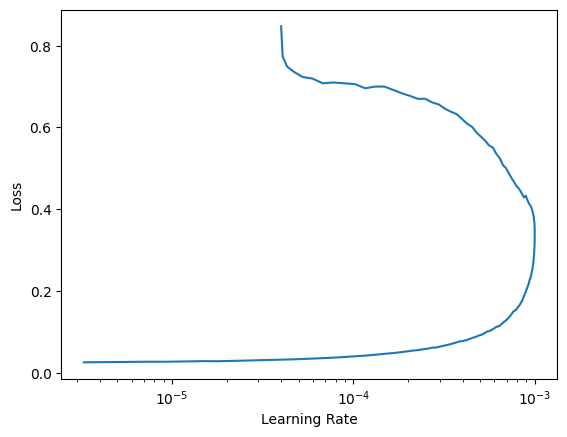

In [7]:
# Optionally, implement a learning rate scheduler
learn.recorder.plot_lr_find()

In [8]:
# Save the trained model
saved_model_path = Path('Saved_Models')
saved_model_path.mkdir(parents=True, exist_ok=True)
learn.path = saved_model_path
learn.save('Mark_VII_KidneyNetV')

Path('Saved_Models/models/Mark_VII_KidneyNetV.pth')